<a href="https://colab.research.google.com/github/IC-03/Royal-Flush/blob/main/Royal_Flush_Classification_Models_For_A_Poker_Hands_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Royal Flush: Classification models for a Poker Hands Dataset
---

![](https://drive.google.com/uc?export=view&id=1KyVqgF2ZzPquw5sAtSzY8IPgt-tc-Dfh)

---

## ♠ About
**Autores**: Isabella Callejas Mandon, Geiner Duvan Guevara Vargas.

**Objetivo**: Clasificar manos de póquer según la combinación que presenten las cartas.

**Disclaimer**: Este proyecto no buscar incentivar a los juegos de azar, esto es para experimentar.

El dataset fue conseguido aquí: [Keel Datasets](https://sci2s.ugr.es/keel/dataset.php?cod=194)

---

## ♣ Contexto
En una baraja estándar de póquer tiene cada carta tiene dos atributos:

- Un palo o suit (S): Corazón, Trebol, Diamante, Picas. Representación respectiva [ 1-4 ]

- Un rango (C): Ace (A), 2-10, Jack o Joker (J), Queen (Q), King (K). Representación respectiva [ 1-13 ].

Es decir, tenemos 13 cartas por cada palo = 13*4 = 52 cartas en total.
Tampoco se tiene en cuenta si las cartas tienen un valor, nos interesan las combinaciones de estas.

Ejemplo:

![](https://drive.google.com/uc?export=view&id=1J_A4gEA7lfiSB3T2LLbCKGCZV5JCeWGw)


Por otra parte, una **mano de poquer** consiste en 5 cartas, hay combinaciones muy específicas que se pueden **clasificar** de la siguiente manera.

[ 0 ] **Nada en mano**: No entra en las otras clasificaciones

![](https://drive.google.com/uc?export=view&id=1C8LWL5HYU_I1jeh0RfYWq6sRJ2Rs795N)

[ 1 ] **Un par**: Dos cartas con el misma rango

![](https://drive.google.com/uc?export=view&id=1ahscQb47MuU9ukC7fd_jLnvH_nNuZVDP)

[ 2 ] **Dos pares**: Dos pares de cartas, los pares son diferentes entre sí

![](https://drive.google.com/uc?export=view&id=1T65kwB1GpUNuqnc89fDGy7uT3ZEeVIcy)

[ 3 ] **Trio**: 3 cartas con la misma letra o número

![](https://drive.google.com/uc?export=view&id=1C1gOmFzB-Ervz4NPxSDiDADNt3stkENR)

[ 4 ] **Escalera**: Las 5 cartas son secuenciales sin importar el palo

![](https://drive.google.com/uc?export=view&id=1qpSiO7IyEirJ6n_P8nNGfoK33BQ6b2xU)

[ 5 ] **Flush/ Color/ Flor**: 5 cartas del mismo palo

![](https://drive.google.com/uc?export=view&id=1wG3BL33F3mmqmDxzhWzQeRc7vxAVf3ak)

[ 6 ] **Full House**: Trio + Par

![](https://drive.google.com/uc?export=view&id=1ort3P87a9XbwSer8jps_670LvFk8drgp)

[ 7 ] **Cuarto de un tipo** : 4 cartas de un mismo rango pero diferentes palos.

[ 8 ] **Escalera de color**: Las 5 cartas son secuenciales y del mismo palo
![](https://drive.google.com/uc?export=view&id=1DqQi_HzrWcZa8J_Ota5Wj4YXV1lYZrAA)

[ 9 ] **Flor Imperial / Royal Flush**: As, K, Q, J, 10 y del mismo palo

![](https://drive.google.com/uc?export=view&id=1HZ-bEq_cbW8ISEQPI42RHRfgIlXN5F3L)


Los icónos diseñados por: [riajulislam](https://www.flaticon.es/packs/playing-cards-16?k=1695384261518&log-in=google)


## Explorando el Dataset

In [ ]:
# @title Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# @title Cargando el drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Accediendo al archivo .csv Isabella
poker = pd.read_csv("/content/drive/MyDrive/Personal stuff/Trabajos en grupo/IA/poker.csv")
poker

In [ ]:
# @title Accediendo al archivo .csv Geiner
poker = pd.read_csv("/content/drive/MyDrive/Copia de poker.csv")
poker.head(20)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
5,2,6,4,11,2,3,4,9,1,7,0
6,3,2,4,9,3,7,4,3,4,5,0
7,4,4,3,13,1,8,3,9,3,10,0
8,1,9,3,8,4,4,1,7,3,5,0
9,4,7,3,12,1,13,1,9,2,6,0


In [ ]:
poker.shape

(1025009, 11)

In [ ]:
poker.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
count,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06,1.025009e+06
mean,2.500696e+00,6.997867e+00,2.499842e+00,7.006289e+00,2.501100e+00,6.999249e+00,2.500284e+00,7.000842e+00,2.499400e+00,6.988824e+00,6.170063e-01
std,1.117736e+00,3.743527e+00,1.118646e+00,3.744051e+00,1.118346e+00,3.741965e+00,1.117215e+00,3.741423e+00,1.118942e+00,3.739934e+00,7.737464e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
50%,3.000000e+00,7.000000e+00,2.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00
75%,3.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,4.000000e+00,1.000000e+01,1.000000e+00
max,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,4.000000e+00,1.300000e+01,9.000000e+00


In [ ]:
poker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025009 entries, 0 to 1025008
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1025009 non-null  int64
 1   C1      1025009 non-null  int64
 2   S2      1025009 non-null  int64
 3   C2      1025009 non-null  int64
 4   S3      1025009 non-null  int64
 5   C3      1025009 non-null  int64
 6   S4      1025009 non-null  int64
 7   C4      1025009 non-null  int64
 8   S5      1025009 non-null  int64
 9   C5      1025009 non-null  int64
 10  Class   1025009 non-null  int64
dtypes: int64(11)
memory usage: 86.0 MB


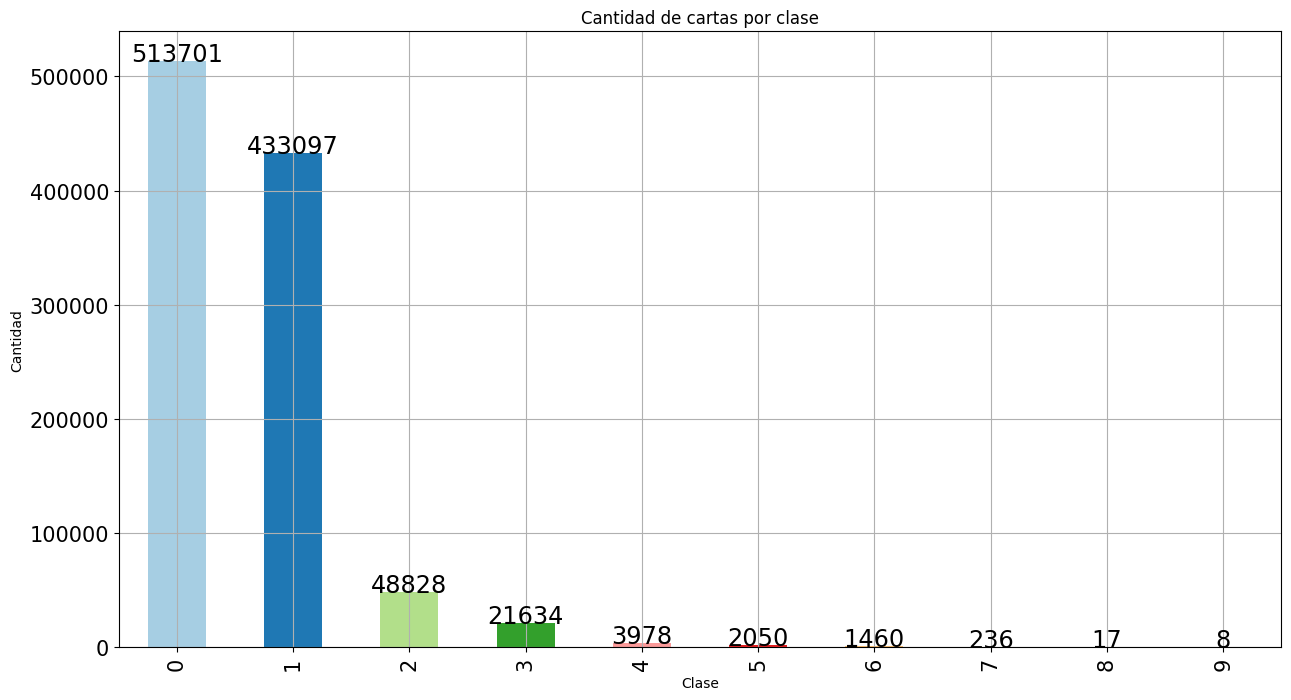

In [ ]:
# @title Grafica de barras del tipo de Mano por Clases
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")
label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]
class_poker.plot( kind='bar', figsize=(15,8), xlabel='Clase', ylabel='Cantidad', layout='constrained', title='Cantidad de cartas por clase',
           xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=15)

for i, total in enumerate(class_poker):
  plt.text(i, total + 0.5, round(total),
          ha = 'center', size='xx-large')

<ipython-input-30-0a867f03dd71>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,1)


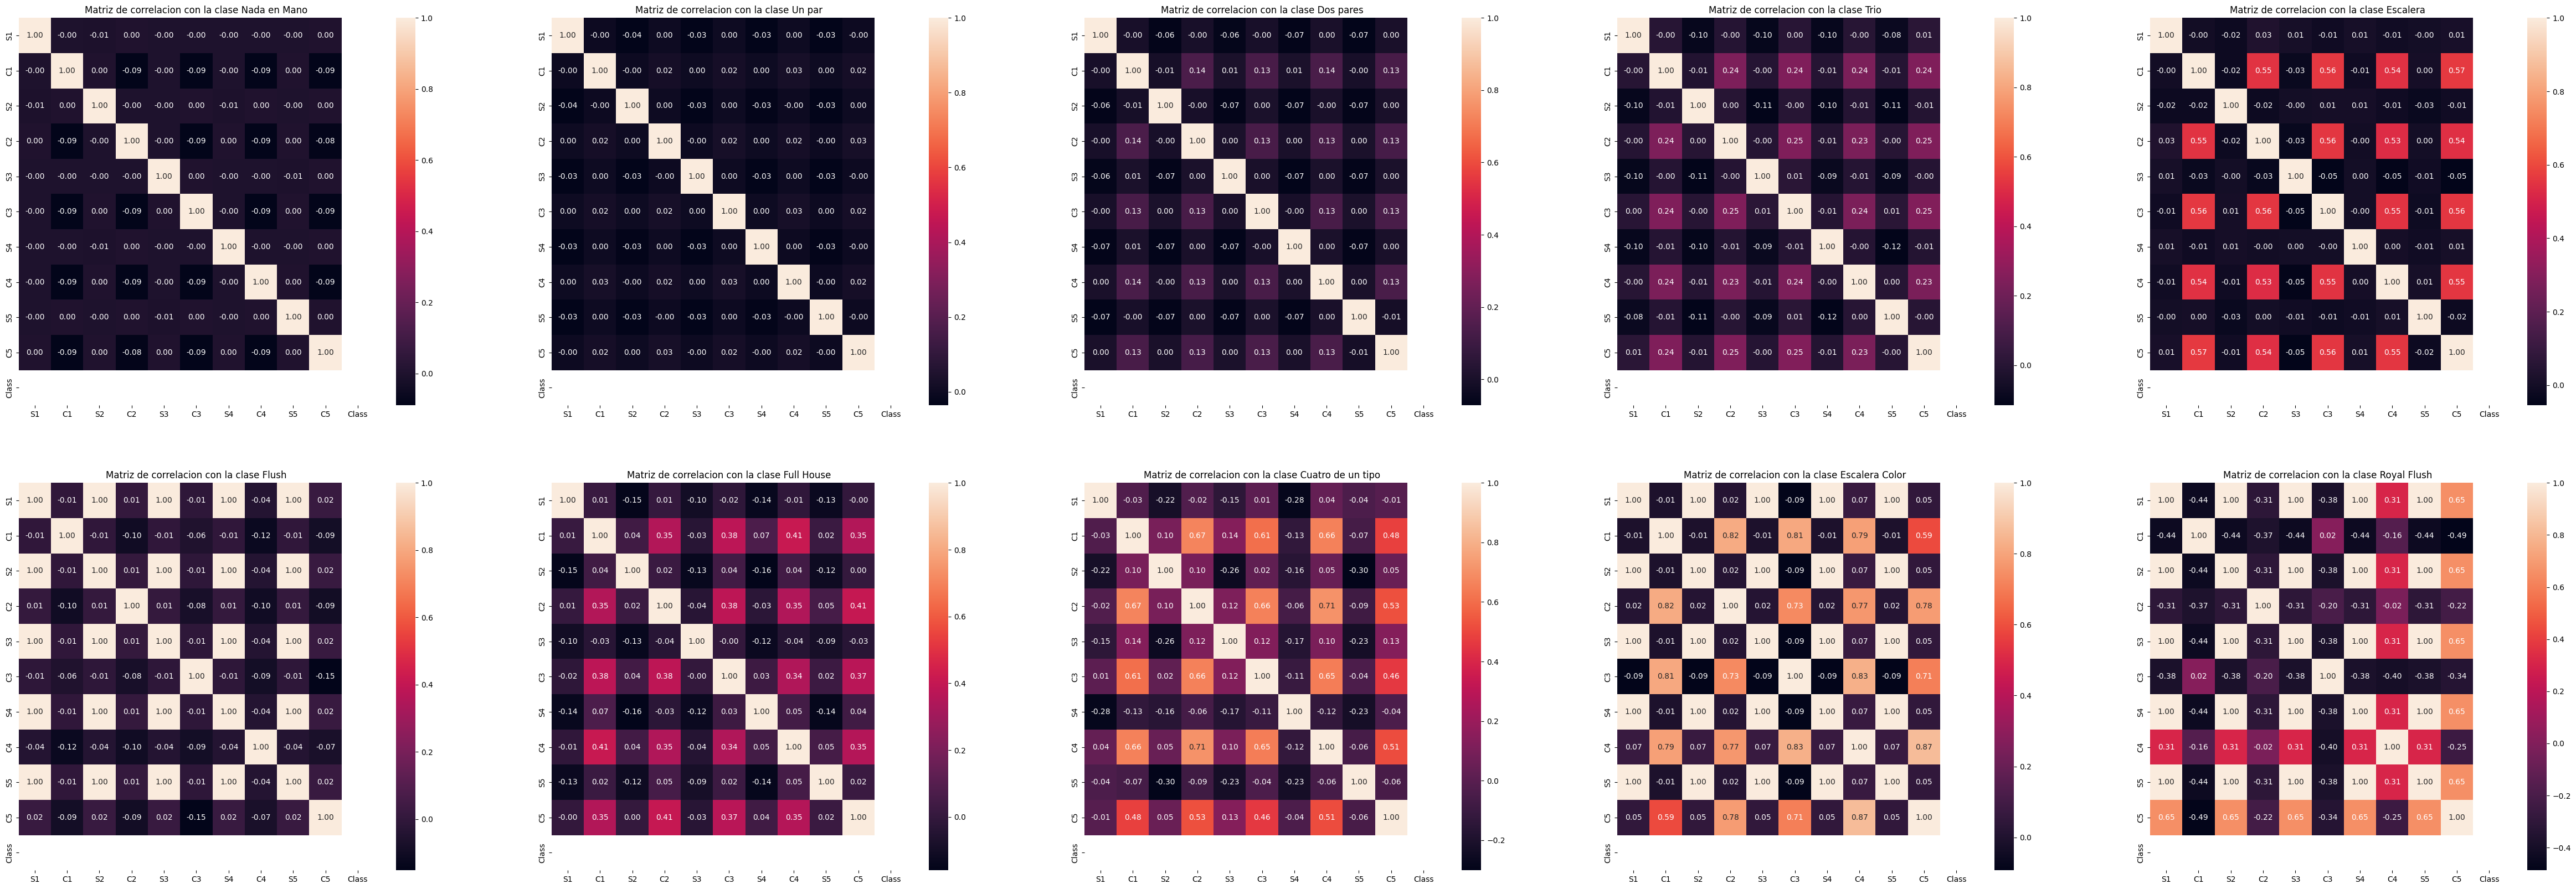

In [ ]:
# @title CORRELACIONES
plt.subplots(figsize=(60,20)) #Importante para que se vean todas las correlaciones
plt.subplot(2,5,1)
plt.title("Matriz de correlacion con la clase Nada en Mano")
corr = poker[poker.Class==0].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,2)
plt.title("Matriz de correlacion con la clase Un par")
corr = poker[poker.Class==1].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,3)
plt.title("Matriz de correlacion con la clase Dos pares")
corr = poker[poker.Class==2].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,4)
plt.title("Matriz de correlacion con la clase Trio")
corr = poker[poker.Class==3].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,5)
plt.title("Matriz de correlacion con la clase Escalera")
corr = poker[poker.Class==4].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,6)
plt.title("Matriz de correlacion con la clase Flush")
corr = poker[poker.Class==5].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,7)
plt.title("Matriz de correlacion con la clase Full House")
corr = poker[poker.Class==6].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,8)
plt.title("Matriz de correlacion con la clase Cuatro de un tipo")
corr = poker[poker.Class==7].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,9)
plt.title("Matriz de correlacion con la clase Escalera Color")
corr = poker[poker.Class==8].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.subplot(2,5,10)
plt.title("Matriz de correlacion con la clase Royal Flush")
corr = poker[poker.Class==9].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

plt.show()

<Axes: title={'center': 'Porcentaje de cartas por clase'}, ylabel='Class'>

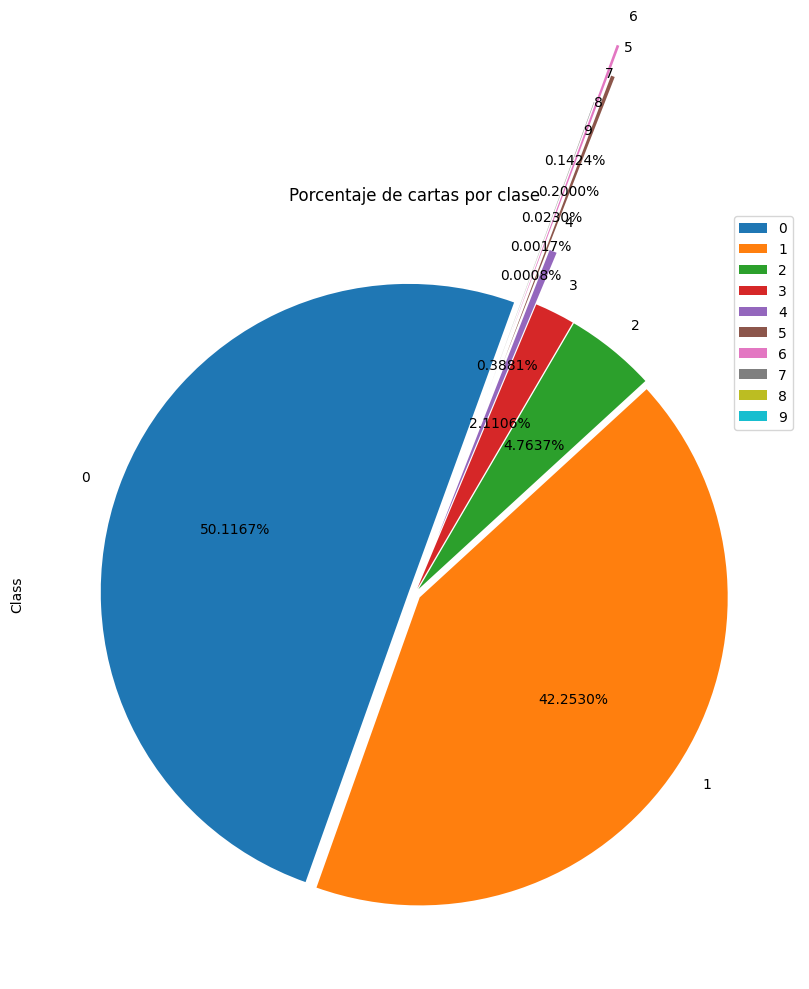

In [ ]:
# @title Gráfica Circular o Pie
# Problem with pie chart and small values! D:
class_poker = poker["Class"].value_counts()
explode = (0.02, 0.02, 0.02, 0.02, 0.20, 0.80, 0.90, 0.70, 0.60, 0.50) #Para sacar los pedacitos de "torta"
class_poker.plot(kind="pie", autopct='%0.04f%%', startangle=70, legend=True, figsize=(20,10), explode=explode, title="Porcentaje de Manos de Cartas por Clase")

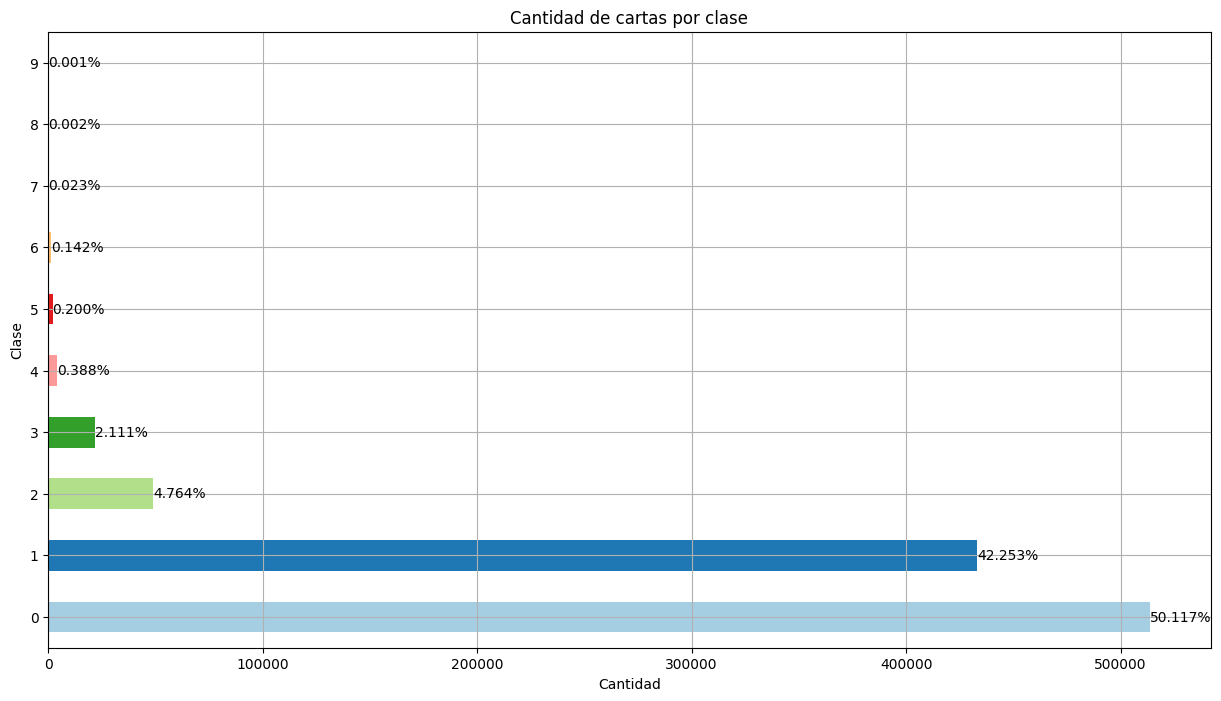

In [ ]:
# @title Gráfica de barras
class_poker = poker.Class.value_counts()
colors_gender = sns.color_palette("Paired")
label = ["Nada en Mano","Un par","Dos pares","Trio","Escalera","Flush","Full House","Escalera Color","Royal Flush"]
class_poker.plot( kind='barh', figsize=(15,8), xlabel='Cantidad', ylabel='Clase', layout='constrained', title='Porcentaje de Manos de Cartas por Clase',
           xlim=(0, 542000), grid='..', legend= False, color=colors_gender, fontsize=10)
total = class_poker.values.sum()
for i in range (len(class_poker)):
   cnt = class_poker[i]
   pcnt = '{:0.3f}%'.format(100*cnt/total)
   plt.text(cnt-20, i, pcnt, va ='center')

In [ ]:
sns.histplot(poker.Class[(
    ((poker.C1 > 10) |
    (poker.C2 > 10) |
    (poker.C3 > 10) |
    (poker.C4 > 10) |
    (poker.C5 > 10)) |(
    (poker.C1 == 0) |
    (poker.C2 == 0) |
    (poker.C3 == 0) |
    (poker.C4 == 0) |
    (poker.C5 == 0))
    )], kde=True, color='blue', bins=9, stat='probability');

### Resumen de nuestro Dataset
1. Poseemos un dataset que principalmente se presta para clasificación de 10 tipos de manos de poquer
2. Contamos con un total de 1'025.009 de datos, sin embargo, la cantidad de registros que poseemos por mano de póquer no es muy balanceado por la misma naturaleza del juego y en comparación a las combinaciones totales tenemos solo un 39.4%  [[ 1 ]](https://es.wikipedia.org/wiki/Manos_de_p%C3%B3quer#Probabilidades)
3. Todos los registros fueron abstraídos y representados en números enteros.
4. Lo que buscamos principalmente es que los modelos que apliquemos a este dataset a lo largo del curso es que puedan reconocer el tipo de mano que posee en cualquier palo y orden de acuerdo a las reglas que viene para cada tipo de mano.